In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# show all columns
pd.set_option('display.max_columns', None)

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%%R 

require('tidyverse')
require('tidyr')
require('stringr')
require('zoo')


R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


R[write to console]: Loading required package: zoo

R[write to console]: 
Attaching package: ‘zoo’


R[write to console]: The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




# Load and clean data

In [93]:
# Load data

points = pd.read_csv('points.csv')
display(points.head(5))

fees = pd.read_csv('fees.csv')
display(fees.head(5))



,Squad,Pts_2023,Pts_2022,Pts_2021,Pts_2020,Pts_2019,Pts_2018,Pts_2017,Pts_2016,Pts_2015,Pts_2014,Pts_2013,Pts_2012,Pts_2011,Pts_2010,Pts_2009,Pts_2008,Pts_2007,Pts_2006,Pts_2005,Pts_2004,Pts_2003,Pts_2002,Pts_2001,Pts_2000,Pts_1999,Pts_1998,Pts_1997,Pts_1996,Pts_1995,Pts_1994,Total_Pts
0,Arsenal,81.0,69.0,61.0,56.0,70.0,63.0,75.0,71.0,75.0,79.0,73.0,70.0,68.0,75.0,72.0,83.0,68.0,67.0,83.0,90.0,78.0,87.0,70.0,73.0,78.0,78.0,68.0,63.0,51.0,71.0,2166.0
1,Aston Villa,54.0,45.0,55.0,35.0,NaN,NaN,NaN,17.0,38.0,38.0,41.0,38.0,48.0,64.0,62.0,60.0,50.0,42.0,47.0,56.0,45.0,50.0,54.0,58.0,55.0,57.0,61.0,63.0,48.0,57.0,1338.0
2,Bournemouth,39.0,NaN,NaN,34.0,45.0,44.0,46.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.0
3,Brentford,50.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0
4,Brighton,55.0,51.0,41.0,41.0,36.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.0


,club_name,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AFC Bournemouth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.055,8.520,55.76,64.380,34.300,111.800,89.535,93.55,39.54,83.10
1,Arsenal,7.850,3.560,11.380,20.550,14.255,30.445,16.70,66.95,105.825,44.685,21.050,28.475,16.380,71.00,27.925,87.675,65.950,59.70,31.100,143.770,121.850,61.400,146.780,29.00,123.350,314.850,89.250,214.450,105.15,198.80,216.16
2,Aston Villa,4.824,5.401,16.637,15.971,12.487,13.850,67.78,14.92,41.935,42.975,15.980,8.670,13.565,22.94,26.525,42.800,63.420,69.00,65.800,64.085,31.030,27.940,14.765,131.25,131.300,20.630,35.250,162.500,104.12,256.80,154.14
3,Birmingham City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.835,19.050,23.920,16.05,52.905,37.775,14.375,20.45,25.775,35.350,10.420,4.950,1.260,8.14,10.285,22.350,2.500,34.080,36.04,0.35,0.60
4,Bolton Wanderers,NaN,NaN,NaN,16.569,NaN,16.123,NaN,NaN,NaN,3.200,5.288,0.825,1.755,6.20,20.850,44.316,34.575,14.00,6.795,31.930,3.488,2.130,0.643,1.77,NaN,6.885,0.225,NaN,NaN,NaN,NaN


In [94]:
%%R -i points,fees

# pivot longer

points <- points %>% 
    pivot_longer(cols=-Squad, names_to='year', values_to='points') %>% 
    mutate(year = as.integer(str_replace(year, 'Pts_', ''))) %>%
    mutate(Squad = str_replace(Squad, 'Nott\'ham Forest', 'Nottingham Forest')) 


fees <- fees %>% 
  pivot_longer(cols = -club_name, values_to='fees') %>% 
  mutate(year = as.integer(name)) %>% 
  select(-name) %>% # drops name column
  mutate(club_name = str_replace_all(club_name, c('AFC ' = '', 
                                                  ' AFC' = '',
                                                    ' & Hove Albion' = '', 
                                                    'Huddersfield Town' = 'Huddersfield', 
                                                    'Tottenham Hotspur' = 'Tottenham', 
                                                    'West Bromwich Albion' = 'West Brom', 
                                                    'West Ham United' = 'West Ham')))



In [95]:
%%R -o points_clubs,fees_clubs
points_clubs <- points %>% select(Squad)  %>% arrange(Squad) %>% unique()
fees_clubs <- fees %>% select(club_name) %>% arrange(club_name) %>% unique()



In [96]:
# Note, these exist in points and note fees, that's because they were relegated
set(points_clubs.Squad.unique()) - set(fees_clubs.club_name.unique())

{'Barnsley',
 'Blackburn',
 'Blackpool',
 'Bradford City',
 'Charlton Ath',
 'Coventry City',
 'Derby County',
 'Ipswich Town',
 'Middlesbrough',
 'Oldham Athletic',
 'Portsmouth',
 'Reading',
 'Sheffield Wednesday',
 'Swindon Town',
 'Wimbledon'}

In [97]:
# no clubs in fees but not points
set(fees_clubs.club_name.unique()) - set(points_clubs.Squad.unique())

set()

In [98]:
fees.club_name.unique()

array(['AFC Bournemouth', 'Arsenal', 'Aston Villa', 'Birmingham City',
       'Bolton Wanderers', 'Brentford', 'Brighton & Hove Albion',
       'Burnley', 'Cardiff City', 'Chelsea', 'Crystal Palace', 'Everton',
       'Fulham', 'Huddersfield Town', 'Hull City', 'Leeds United',
       'Leicester City', 'Liverpool', 'Manchester City',
       'Manchester United', 'Newcastle United', 'Norwich City',
       'Nottingham Forest', 'Queens Park Rangers', 'Sheffield United',
       'Southampton', 'Stoke City', 'Sunderland AFC', 'Swansea City',
       'Tottenham Hotspur', 'Watford', 'West Bromwich Albion',
       'West Ham United', 'Wigan Athletic', 'Wolverhampton Wanderers'],
      dtype=object)

In [99]:
points.Squad.unique()

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton',
       'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Leeds United',
       'Leicester City', 'Liverpool', 'Manchester City',
       'Manchester United', 'Newcastle United', 'Nottingham Forest',
       'Southampton', 'Tottenham', 'West Ham', 'Wolverhampton Wanderers',
       'Burnley', 'Norwich City', 'Watford', 'Sheffield United',
       'West Brom', 'Cardiff City', 'Huddersfield', 'Stoke City',
       'Swansea City', 'Hull City', 'Middlesbrough', 'Sunderland',
       'Queens Park Rangers', 'Reading', 'Wigan Athletic', 'Blackburn',
       'Bolton Wanderers', 'Birmingham City', 'Blackpool', 'Portsmouth',
       'Derby County', 'Charlton Ath', 'Ipswich Town', 'Bradford City',
       'Coventry City', 'Sheffield Wednesday', 'Wimbledon', 'Barnsley',
       'Oldham Athletic', 'Swindon Town'], dtype=object)

## Join

In [100]:
%%R -o df

# merge fees and points on club_name and Squad respectively
df <- fees %>% merge(points, by.x = c('club_name','year'), by.y = c('Squad','year')) 
df %>% head()


  club_name year   fees points
1   Arsenal 1994 11.380     71
2   Arsenal 1995 20.550     51
3   Arsenal 1996 14.255     63
4   Arsenal 1997 30.445     68
5   Arsenal 1998 16.700     78
6   Arsenal 1999 66.950     78


# Analysis

In [101]:
%%R 

# TODO  - make sure that if a year is mising, it is rollmeanr is dividing by 3 and not 4
# calculate a column that is fees from the last 4 years of a club
df <- df %>% 
    group_by(club_name) %>%
    mutate(
        fees_4 = rollsumr(fees, 4, fill = NA),
        points_4_avg = rollmeanr(points, 4, fill = NA)
    ) %>%
    ungroup() %>% 
    filter(year > 1997)

df

# A tibble: 875 × 6
   club_name  year  fees points fees_4 points_4_avg
   <chr>     <int> <dbl>  <dbl>  <dbl>        <dbl>
 1 Arsenal    1998  16.7     78   81.9         65  
 2 Arsenal    1999  67.0     78  128.          71.8
 3 Arsenal    2000 106.      73  220.          74.2
 4 Arsenal    2001  44.7     70  234.          74.8
 5 Arsenal    2002  21.0     87  239.          77  
 6 Arsenal    2003  28.5     78  200.          77  
 7 Arsenal    2004  16.4     90  111.          81.2
 8 Arsenal    2005  71       83  137.          84.5
 9 Arsenal    2006  27.9     67  144.          79.5
10 Arsenal    2007  87.7     68  203.          77  
# … with 865 more rows
# ℹ Use `print(n = ...)` to see more rows


`geom_smooth()` using formula = 'y ~ x'


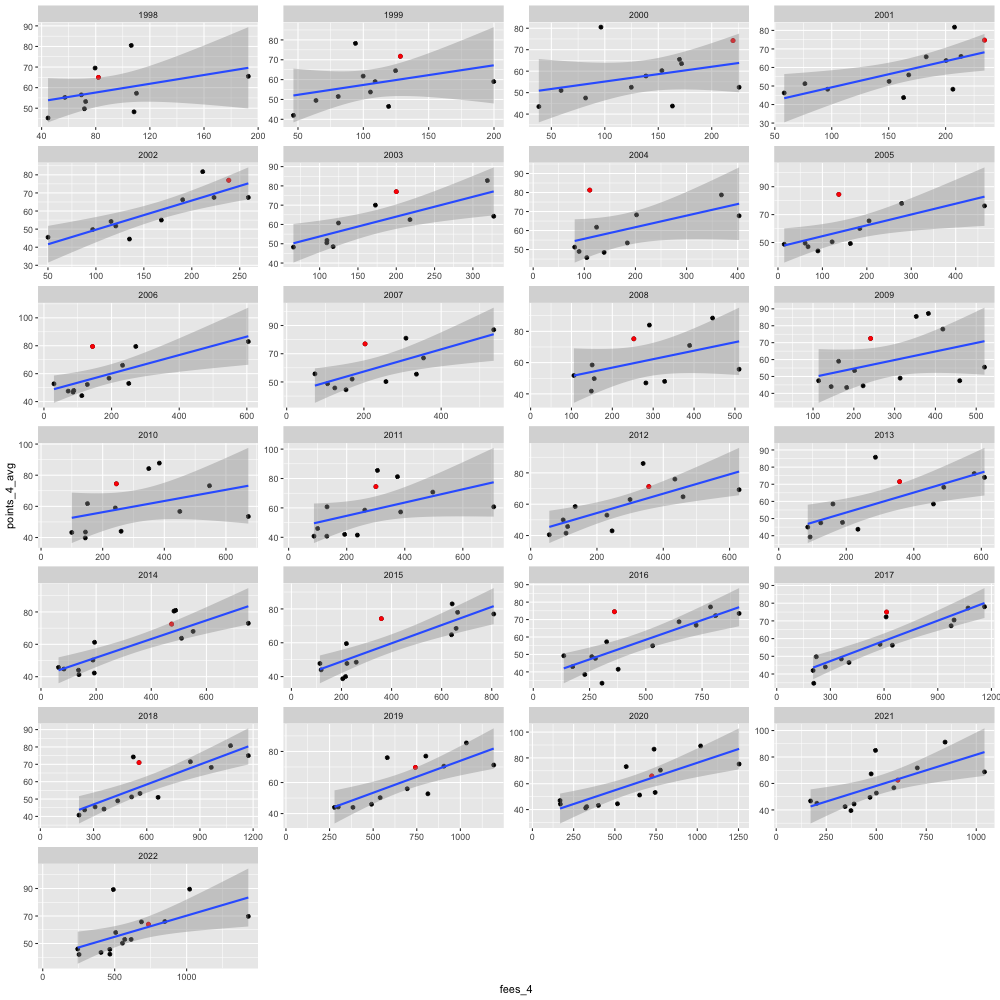

In [105]:
%%R -w 1000 -h 1000
# Exploratory data analysis

ggplot(df) +
    aes(x=fees_4, y=points_4_avg) +
    geom_point() +
    geom_point(data = df %>% filter(club_name == "Arsenal"), color='red') +
    geom_smooth(method='lm') +
    facet_wrap(~year, ncol=4, scales='free') 


In [ ]:
# To do next

- run regressions for each year y=points_4_avg , x=fees_4
- look at r^2 of those for each year and p-values
- residuals for each club over time
